<a href="https://colab.research.google.com/github/mcocroft98/MCocroft-DSP557-Project/blob/main/Energy_Consumption_in_the_Steel_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Import Packages

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

## Import Data

In [72]:
from google.colab import files
uploaded = files.upload()

data = pd.read_excel('steel_data1.xlsx')

Saving steel_data1.xlsx to steel_data1 (2).xlsx


### Rename Columns

In [73]:
# Rename power columns
data = data.rename(columns = {'Lagging_Current_Reactive.Power_kVarh':'LaggingCP_Reactive'})
data = data.rename(columns = {'Leading_Current_Reactive_Power_kVarh':'LeadingCP_Reactive'})
data = data.rename(columns = {'CO2(tCO2)':'CO2'})
data = data.rename(columns = {'Lagging_Current_Power_Factor':'LaggingCP_Factor'})
data = data.rename(columns = {'Leading_Current_Power_Factor':'LeadingCP_Factor'})

### Check for missing values

In [74]:
data.isnull().values.any()

False

### Look at Data Head

In [75]:
data.head()

,date,Usage_kWh,LaggingCP_Reactive,LeadingCP_Reactive,CO2,LaggingCP_Factor,LeadingCP_Factor,NSM,Week_Status,Day_of_week,Load_Type,Shift,Season,Rainy_Season,Major_Holiday
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,1,1,0,2,1,0,1
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,1,0,2,1,0,1
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,1,0,2,1,0,1
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,0,3,1,0,1
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,1,0,3,1,0,1


### Check data description

In [76]:
data.describe()

,Usage_kWh,LaggingCP_Reactive,LeadingCP_Reactive,CO2,LaggingCP_Factor,LeadingCP_Factor,NSM,Week_Status,Day_of_week,Load_Type,Shift,Season,Rainy_Season,Major_Holiday
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.715068,3.991781,0.691781,2.000000,2.336986,0.169863,0.043836
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388,2.003433,0.792658,0.816508,1.176907,0.375518,0.204732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,1.000000,4.000000,0.000000,2.000000,2.000000,0.000000,0.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000,6.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000,7.000000,2.000000,3.000000,4.000000,1.000000,1.000000


### Check feature distributions

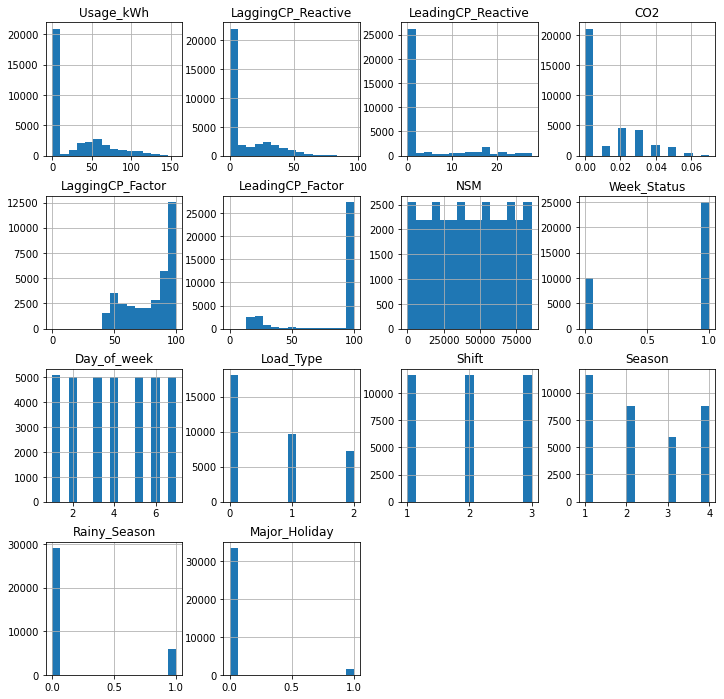

In [77]:
# Plot distributions
data.hist(bins = 15, figsize = (12, 12))
plt.show()

### Zooming in on energy data

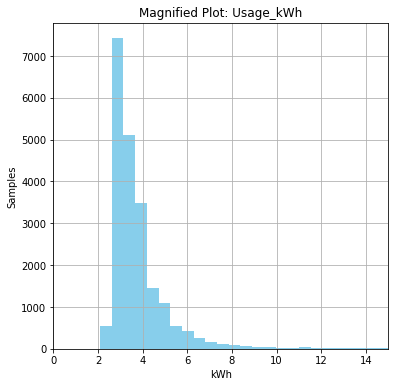

In [78]:
# Zoomed toward zero: Usage_kWh
data['Usage_kWh'].hist(color = 'skyblue', bins = 300, figsize = (6, 6))
plt.xlim(0, 15)
plt.title('Magnified Plot: Usage_kWh')
plt.xlabel('kWh')
plt.ylabel('Samples')
plt.show()

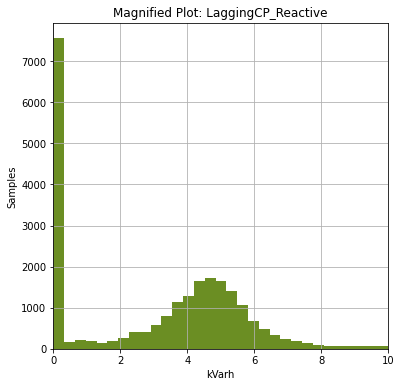

In [79]:
# Zoomed toward zero:  LaggingCP_Reactive
data['LaggingCP_Reactive'].hist(color = 'olivedrab', bins = 300, figsize = (6, 6))
plt.xlim(0, 10)
plt.title('Magnified Plot: LaggingCP_Reactive')
plt.xlabel('kVarh')
plt.ylabel('Samples')
plt.show()

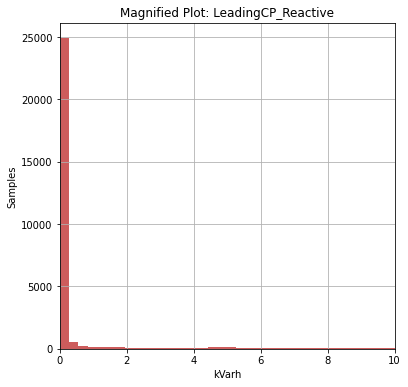

In [133]:
# Zoomed toward zero: LeadingCP_Reactive
data['LeadingCP_Reactive'].hist(color = 'indianred', bins = 100, figsize = (6, 6))
plt.xlim(0, 10)
plt.title('Magnified Plot: LeadingCP_Reactive')
plt.xlabel('kVarh')
plt.ylabel('Samples')
plt.show()

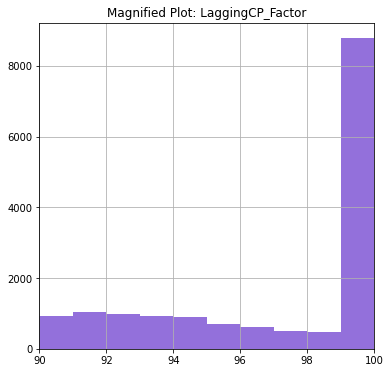

In [81]:
# Zoomed toward 100: LaggingCP_Factor
data['LaggingCP_Factor'].hist(color = 'mediumpurple', bins = 100, figsize = (6, 6))
plt.xlim(90, 100)
plt.title('Magnified Plot: LaggingCP_Factor')
plt.xlabel('Percentage')
plt.ylabel('Samples')
plt.show()

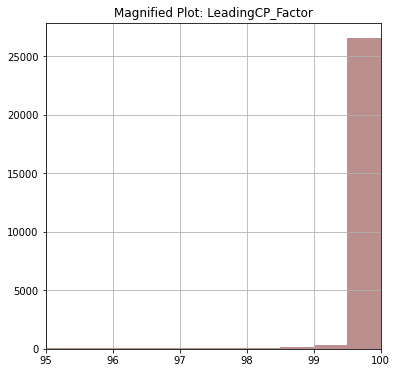

In [82]:
# Zoomed LeadingCP_Factor
data['LeadingCP_Factor'].hist(color = 'rosybrown', bins = 200, figsize = (6, 6))
plt.xlim(95, 100)
plt.title('Magnified Plot: LeadingCP_Factor')
plt.xlabel('Percentage')
plt.ylabel('Samples')
plt.show()

### Highlight cyclical nature of the energy consumption

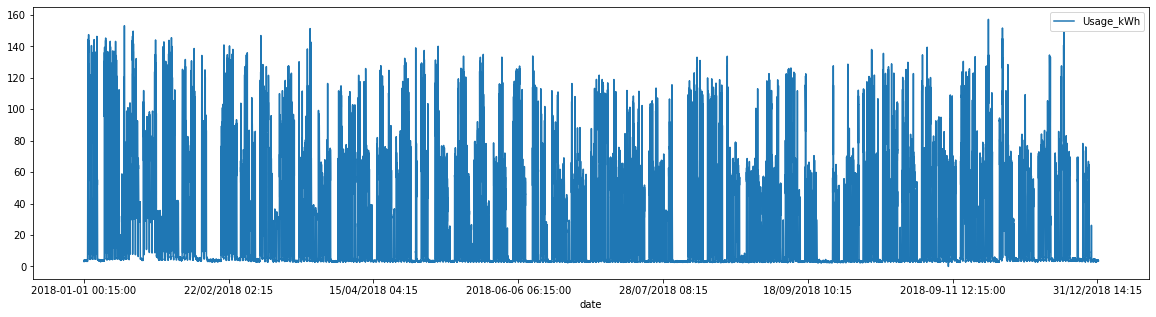

In [83]:
# Plot all energy consumption: All Data
data.plot('date', 'Usage_kWh', figsize = (20, 5))

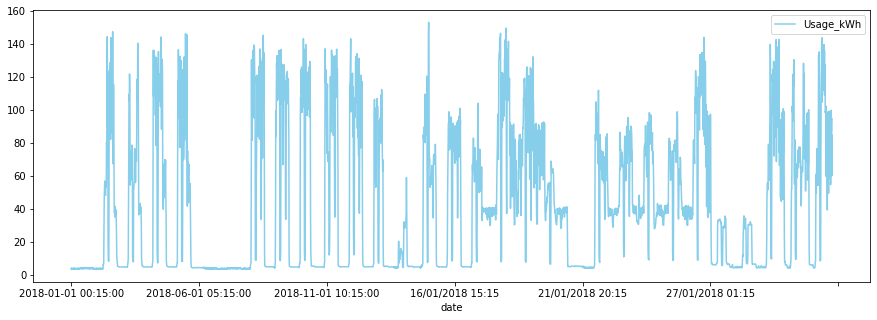

In [84]:
# Plot energy consumption (1 month per season): Winter - January
data[:2977].plot('date', 'Usage_kWh', color = 'skyblue', figsize = (15, 5))

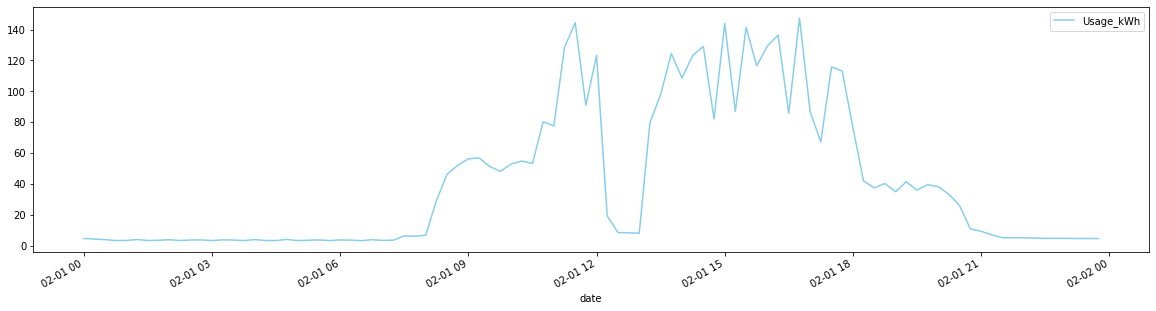

In [85]:
# Zooming in on a day: January 2
data[97:192].plot('date', 'Usage_kWh', color = 'skyblue', figsize = (20, 5))

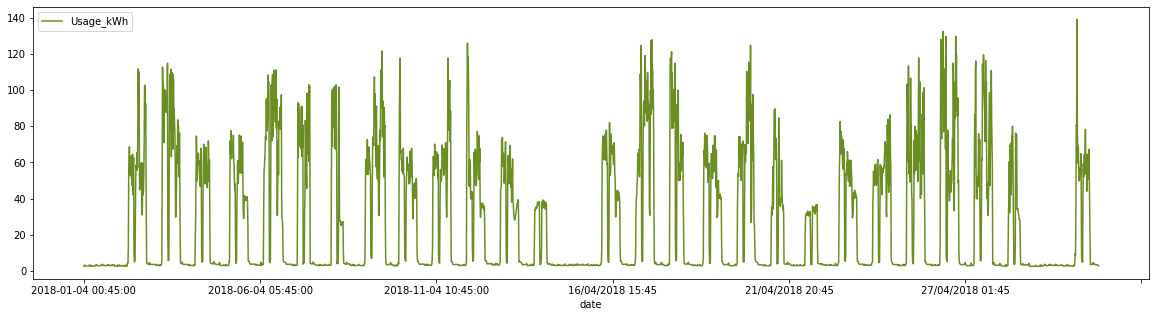

In [86]:
# Plot energy consumption (1 month per season): Spring - April
data[8642:11521].plot('date', 'Usage_kWh', color = 'olivedrab', figsize = (20, 5))

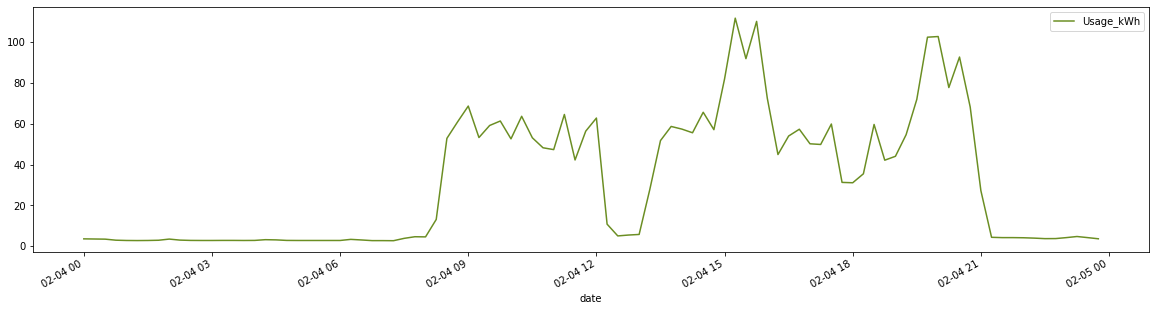

In [87]:
# Zooming in on a day: April 2
data[8737:8832].plot('date', 'Usage_kWh', color = 'olivedrab', figsize = (20, 5))

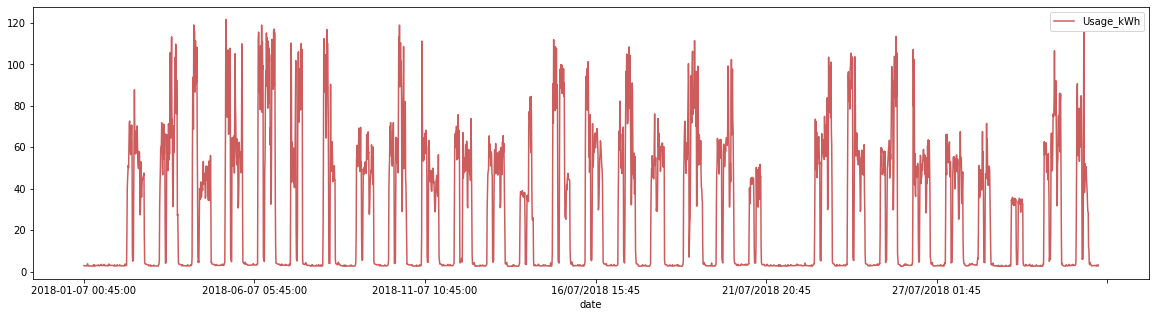

In [88]:
# Plot energy consumption (1 month per season): Summer/Rainy - July
data[17378:20353].plot('date', 'Usage_kWh', color = 'indianred', figsize = (20, 5))

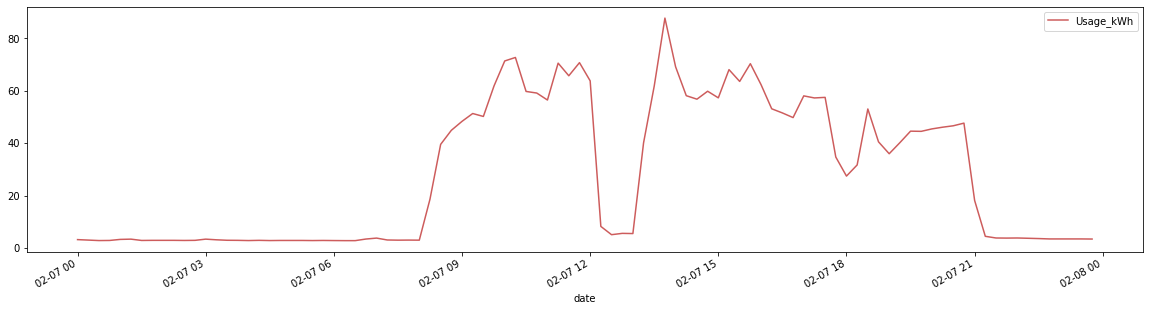

In [89]:
# Zooming in on a day: July 2
data[17473:17568].plot('date', 'Usage_kWh', color = 'indianred', figsize = (20, 5))

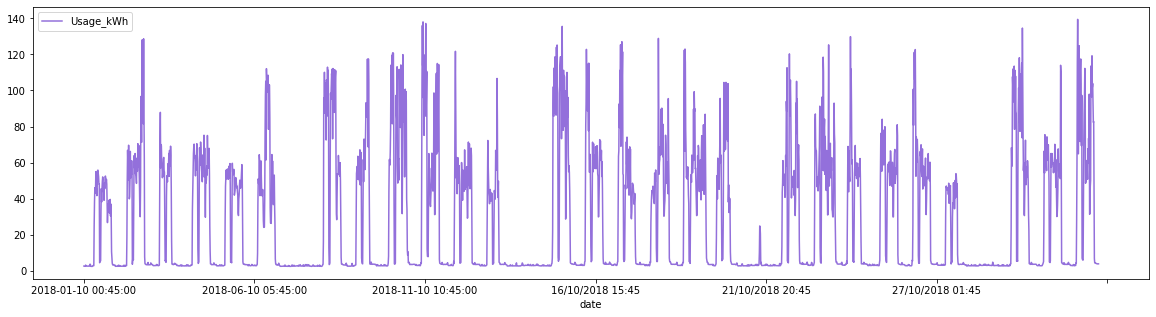

In [90]:
# Plot all energy consumption (1 month per season): Fall - October
data[26210:29185].plot('date', 'Usage_kWh', color = 'mediumpurple', figsize = (20, 5))

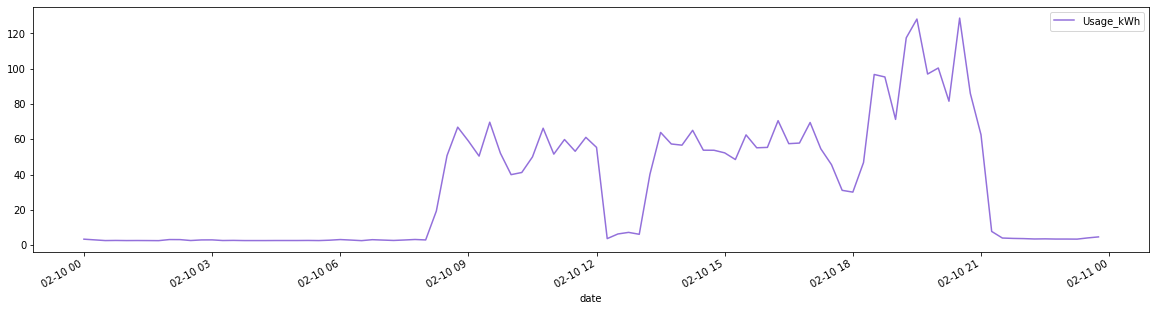

In [91]:
# Zooming in on a day: October 2
data[26305:26400].plot('date', 'Usage_kWh', color = 'mediumpurple', figsize = (20, 5))

### Energy Consumption by Season

Text(0, 0.5, 'Avg. Energy Consumption (kWh - 15 min. period)')

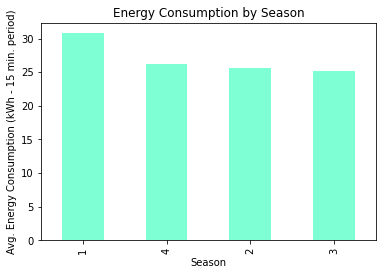

In [92]:
# Plot Usage_kWh against Season
data.groupby('Season')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'aquamarine')
plt.title('Energy Consumption by Season')
plt.xlabel('Season')
plt.ylabel('Avg. Energy Consumption (kWh - 15 min. period)')

### Visualize energy consumption by load type

Text(0, 0.5, 'Avg. Energy Consumption (kWh - 15 min. period)')

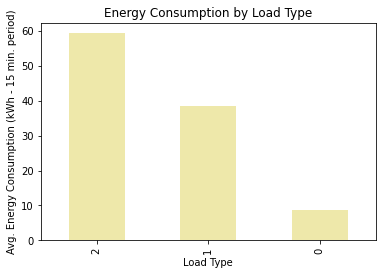

In [93]:
# Plot Usage_kWh against Load_Type
data.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'palegoldenrod')
plt.title('Energy Consumption by Load Type')
plt.xlabel('Load Type')
plt.ylabel('Avg. Energy Consumption (kWh - 15 min. period)')

### Visualize energy consumption by the day of the week

Text(0, 0.5, 'Avg. Energy Consumption (kWh - 15 min. period)')

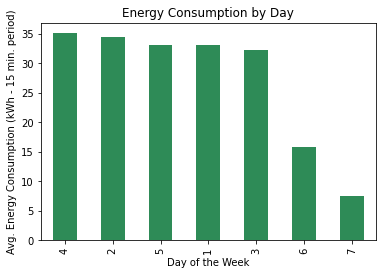

In [94]:
data.groupby('Day_of_week')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'seagreen')
plt.title('Energy Consumption by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Avg. Energy Consumption (kWh - 15 min. period)')

### Visualize energy consumption on holidays vs non-holidays

Text(0, 0.5, 'Avg. Energy Consumption (kWh - 15 min. period)')

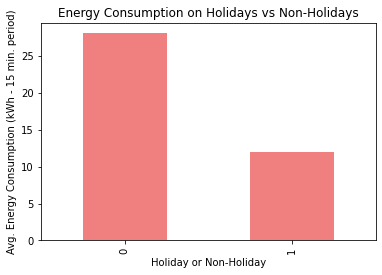

In [95]:
data.groupby('Major_Holiday')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'lightcoral')
plt.title('Energy Consumption on Holidays vs Non-Holidays')
plt.xlabel('Holiday or Non-Holiday')
plt.ylabel('Avg. Energy Consumption (kWh - 15 min. period)')

### Visualize energy consumption by shift

Text(0, 0.5, 'Avg. Energy Consumption (kWh - 15 min. period)')

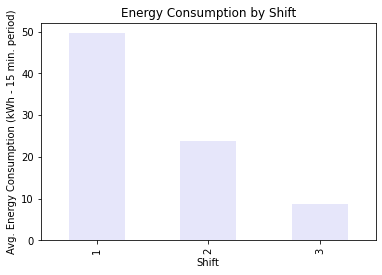

In [96]:
data.groupby('Shift')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'lavender')
plt.title('Energy Consumption by Shift')
plt.xlabel('Shift')
plt.ylabel('Avg. Energy Consumption (kWh - 15 min. period)')

## Make data copies

In [97]:
# Make copies of data for each version of the data set that will be used
addended = data.copy()
original = data.copy()
date_only = data.copy()

### Review the addended data

In [98]:
# Check data shape
addended.shape

(35040, 15)

In [99]:
# Check columns
addended.columns

Index(['date', 'Usage_kWh', 'LaggingCP_Reactive', 'LeadingCP_Reactive', 'CO2',
       'LaggingCP_Factor', 'LeadingCP_Factor', 'NSM', 'Week_Status',
       'Day_of_week', 'Load_Type', 'Shift', 'Season', 'Rainy_Season',
       'Major_Holiday'],
      dtype='object')

In [100]:
# Check info
addended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                35040 non-null  object 
 1   Usage_kWh           35040 non-null  float64
 2   LaggingCP_Reactive  35040 non-null  float64
 3   LeadingCP_Reactive  35040 non-null  float64
 4   CO2                 35040 non-null  float64
 5   LaggingCP_Factor    35040 non-null  float64
 6   LeadingCP_Factor    35040 non-null  float64
 7   NSM                 35040 non-null  int64  
 8   Week_Status         35040 non-null  int64  
 9   Day_of_week         35040 non-null  int64  
 10  Load_Type           35040 non-null  int64  
 11  Shift               35040 non-null  int64  
 12  Season              35040 non-null  int64  
 13  Rainy_Season        35040 non-null  int64  
 14  Major_Holiday       35040 non-null  int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 4.0+

In [101]:
# Check head
addended.head()

,date,Usage_kWh,LaggingCP_Reactive,LeadingCP_Reactive,CO2,LaggingCP_Factor,LeadingCP_Factor,NSM,Week_Status,Day_of_week,Load_Type,Shift,Season,Rainy_Season,Major_Holiday
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,1,1,0,2,1,0,1
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,1,0,2,1,0,1
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,1,0,2,1,0,1
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,0,3,1,0,1
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,1,0,3,1,0,1


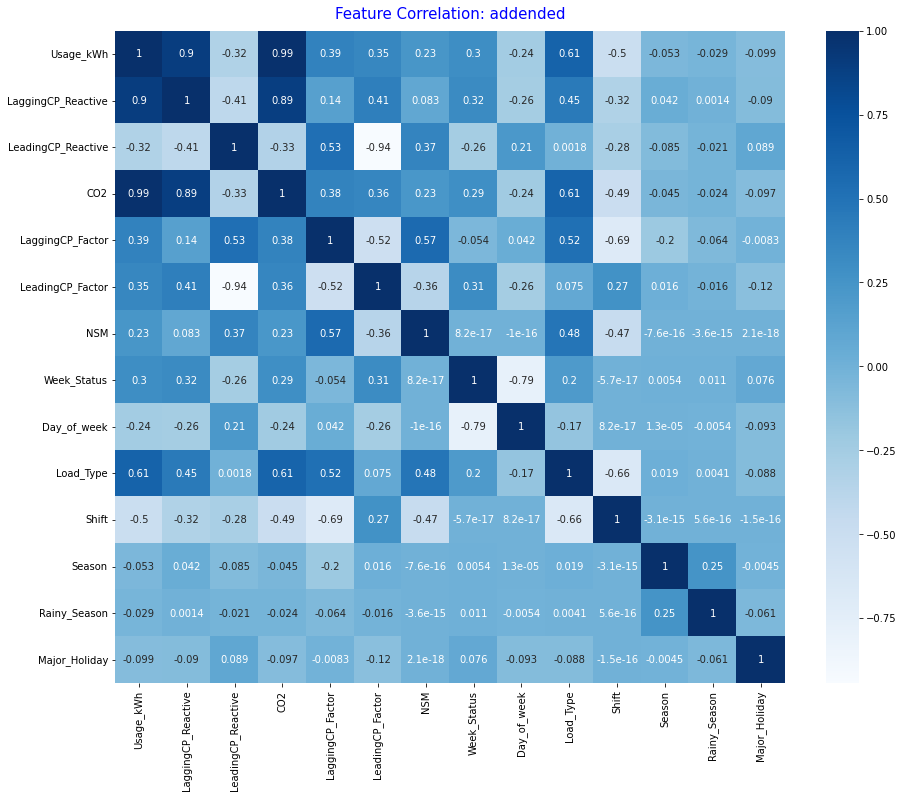

In [102]:
# Check feature correlations
plt.figure(figsize = (15, 12))
sns.heatmap(addended.corr(), annot = True, cmap = 'Blues')
plt.title("Feature Correlation: addended", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

### Review the original data

In [103]:
# Edit 'original' data back down to what features the original Kaggle data set had
original = original.drop(['Shift', 'Season', 'Rainy_Season', 'Major_Holiday'], axis = 1)

In [104]:
# Check shape
original.shape

(35040, 11)

In [105]:
# Check columns
original.columns

Index(['date', 'Usage_kWh', 'LaggingCP_Reactive', 'LeadingCP_Reactive', 'CO2',
       'LaggingCP_Factor', 'LeadingCP_Factor', 'NSM', 'Week_Status',
       'Day_of_week', 'Load_Type'],
      dtype='object')

In [106]:
# Check info
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                35040 non-null  object 
 1   Usage_kWh           35040 non-null  float64
 2   LaggingCP_Reactive  35040 non-null  float64
 3   LeadingCP_Reactive  35040 non-null  float64
 4   CO2                 35040 non-null  float64
 5   LaggingCP_Factor    35040 non-null  float64
 6   LeadingCP_Factor    35040 non-null  float64
 7   NSM                 35040 non-null  int64  
 8   Week_Status         35040 non-null  int64  
 9   Day_of_week         35040 non-null  int64  
 10  Load_Type           35040 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 2.9+ MB


In [107]:
# Check head
original.head()

,date,Usage_kWh,LaggingCP_Reactive,LeadingCP_Reactive,CO2,LaggingCP_Factor,LeadingCP_Factor,NSM,Week_Status,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,1,1,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,1,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,1,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,1,0


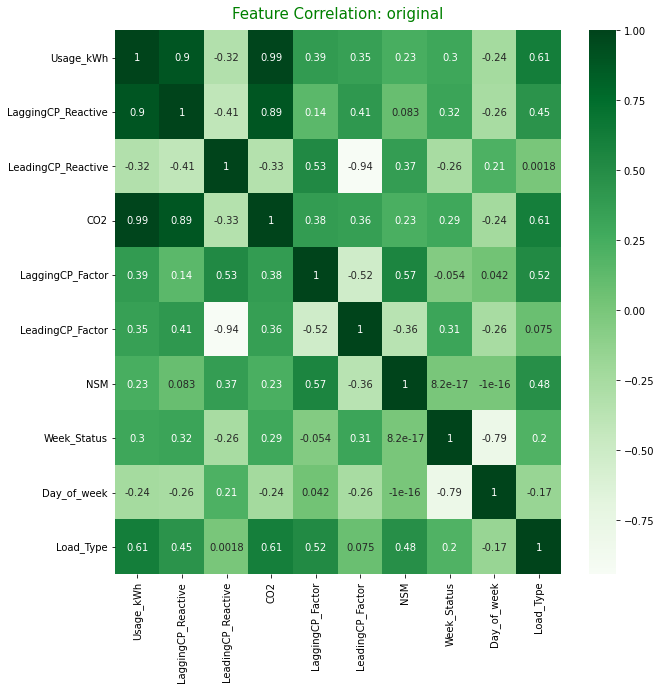

In [108]:
# Check feature correlations
plt.figure(figsize = (10, 10))
sns.heatmap(original.corr(), annot = True, cmap = 'Greens')
plt.title("Feature Correlation: original", fontsize = 15, color = 'g', pad = 12, loc = 'center')
plt.show()

### Review the date_only data

In [109]:
# Edit date only to contain only features that directly relate to time and date
date_only = date_only.drop(['LeadingCP_Reactive', 'LaggingCP_Reactive','CO2', 'LaggingCP_Factor',
                            'LeadingCP_Factor', 'Load_Type'], axis = 1)

In [110]:
# Check shape
date_only.shape

(35040, 9)

In [111]:
# Check columns
date_only.columns

Index(['date', 'Usage_kWh', 'NSM', 'Week_Status', 'Day_of_week', 'Shift',
       'Season', 'Rainy_Season', 'Major_Holiday'],
      dtype='object')

In [112]:
# Check info
date_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           35040 non-null  object 
 1   Usage_kWh      35040 non-null  float64
 2   NSM            35040 non-null  int64  
 3   Week_Status    35040 non-null  int64  
 4   Day_of_week    35040 non-null  int64  
 5   Shift          35040 non-null  int64  
 6   Season         35040 non-null  int64  
 7   Rainy_Season   35040 non-null  int64  
 8   Major_Holiday  35040 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 2.4+ MB


In [113]:
# Check head
date_only.head()

,date,Usage_kWh,NSM,Week_Status,Day_of_week,Shift,Season,Rainy_Season,Major_Holiday
0,2018-01-01 00:15:00,3.17,900,1,1,2,1,0,1
1,2018-01-01 00:30:00,4.00,1800,1,1,2,1,0,1
2,2018-01-01 00:45:00,3.24,2700,1,1,2,1,0,1
3,2018-01-01 01:00:00,3.31,3600,1,1,3,1,0,1
4,2018-01-01 01:15:00,3.82,4500,1,1,3,1,0,1


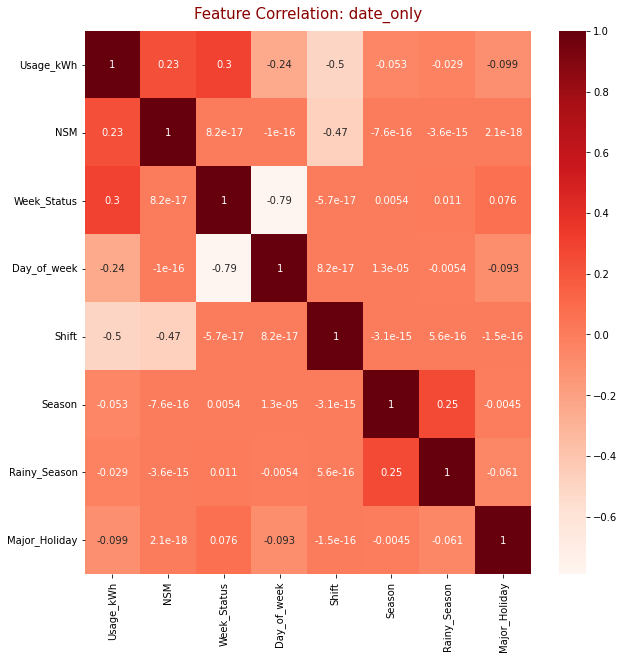

In [114]:
# Check feature correlations
plt.figure(figsize = (10, 10))
sns.heatmap(date_only.corr(), annot = True, cmap = 'Reds')
plt.title("Feature Correlation: date_only", fontsize = 15, color = 'darkred', pad = 12, loc = 'center')
plt.show()

# Regression Models

## Creating training and test sets

### addended

In [115]:
# indexing by date
addended = addended.set_index('date')

# Make training and test sets

X1 = addended.drop('Usage_kWh', axis = 1)
y1 = addended['Usage_kWh']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, 
                                                        random_state = 444)


### original


In [116]:
# indexing by date
original = original.set_index('date')

# Make training and test sets

X2 = original.drop('Usage_kWh', axis = 1)
y2 = original['Usage_kWh']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, 
                                                        random_state = 444)

### date_only

In [117]:
# indexing by date
date_only = date_only.set_index('date')

# Make training and test sets

X3 = date_only.drop('Usage_kWh', axis = 1)
y3 = date_only['Usage_kWh']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, 
                                                        random_state = 444)

## Linear Models

### addended

In [118]:
lr1 = LinearRegression()

%time lr1.fit(X1_train, y1_train)

lr1.score(X1_test, y1_test)

CPU times: user 15 ms, sys: 5.89 ms, total: 20.9 ms
Wall time: 19.8 ms


0.9820735047395505

### original

In [119]:
lr2 =LinearRegression()

%time lr2.fit(X2_train, y2_train)

lr2.score(X2_test, y2_test)

CPU times: user 11.5 ms, sys: 975 µs, total: 12.5 ms
Wall time: 13.6 ms


0.981988138479261

### date_only

In [120]:
lr3 =LinearRegression()

%time lr3.fit(X3_train, y3_train)

lr3.score(X3_test, y3_test)

CPU times: user 8.62 ms, sys: 1.99 ms, total: 10.6 ms
Wall time: 11.3 ms


0.34642251098686816

## Ridge Models

### addended

In [121]:
ridge1 = Ridge(alpha = 0.5)

%time ridge1.fit(X1_train, y1_train)

ridge1.score(X1_test, y1_test)

CPU times: user 8.4 ms, sys: 966 µs, total: 9.37 ms
Wall time: 12 ms


0.9696855454078779

### original

In [122]:
ridge2 = Ridge(alpha = 0.5)

%time ridge2.fit(X2_train, y2_train)

ridge2.score(X2_test, y2_test)

CPU times: user 9.85 ms, sys: 994 µs, total: 10.8 ms
Wall time: 12.2 ms


0.9695496649641762

### date_only

In [123]:
ridge3 = Ridge(alpha = 0.5)

%time ridge3.fit(X3_train, y3_train)

ridge3.score(X3_test, y3_test)

CPU times: user 5.99 ms, sys: 1 ms, total: 7 ms
Wall time: 6.68 ms


0.34642604257408305

## Lasso Models

### addended

In [124]:
lasso1 = Lasso(alpha = 0.5)

%time lasso1.fit(X1_train, y1_train)

lasso1.score(X1_test, y1_test)

CPU times: user 64.9 ms, sys: 24.9 ms, total: 89.8 ms
Wall time: 56.8 ms


0.9136393557505469

### original

In [125]:
lasso2 = Lasso(alpha = 0.5)

%time lasso2.fit(X2_train, y2_train)

lasso2.score(X2_test, y2_test)

CPU times: user 51.8 ms, sys: 20.1 ms, total: 71.9 ms
Wall time: 49.2 ms


0.9116509933886827

### date_only

In [126]:
lasso3 = Lasso(alpha = 0.5)

%time lasso3.fit(X3_train, y3_train)

lasso3.score(X3_test, y3_test)

CPU times: user 11.4 ms, sys: 1.03 ms, total: 12.5 ms
Wall time: 14.9 ms


0.342116842186582

# Moving forward with Linear Regression...

### Further evaluation: addended

In [127]:
y1_pred = lr1.predict(X1_test)

print('MAE: ', metrics.mean_absolute_error(y1_test, y1_pred))
print('MSE: ', metrics.mean_squared_error(y1_test, y1_pred))
print('Root MSE: ', math.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

MAE:  2.5683574500639734
MSE:  19.823835344063138
Root MSE:  4.452396584319858


### Further evaluation: original

In [128]:
y2_pred = lr2.predict(X2_test)

print('MAE: ', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE: ', metrics.mean_squared_error(y2_test, y2_pred))
print('Root MSE: ', math.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE:  2.533621175866978
MSE:  19.918236768509473
Root MSE:  4.462985185781987


### Further evaluation: date_only

In [129]:
y3_pred = lr3.predict(X3_test)

print('MAE: ', metrics.mean_absolute_error(y3_test, y3_pred))
print('MSE: ', metrics.mean_squared_error(y3_test, y3_pred))
print('Root MSE: ', math.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

MAE:  20.415545924213994
MSE:  722.7521240790313
Root MSE:  26.884049622016235


### Visualize each model

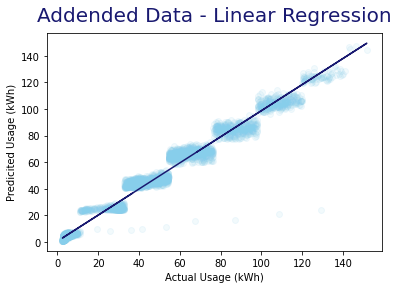

In [130]:
# Addended Visualization 
x1 = y1_test
y1 = y1_pred

plt.title('Addended Data - Linear Regression', color = 'midnightblue', fontsize = 20, pad = 12, loc = 'center')
plt.plot(x1, y1, 'o', color = 'skyblue', alpha = 0.1)

m1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, m1 * x1 + b1, color = 'midnightblue')
plt.xlabel('Actual Usage (kWh)')
plt.ylabel('Predicited Usage (kWh)')
plt.show()

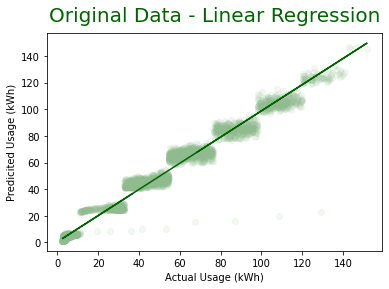

In [131]:
# Original Visualization 
x2 = y2_test
y2 = y2_pred

plt.title('Original Data - Linear Regression', color = 'darkgreen', fontsize = 20, pad = 12, loc = 'center')
plt.plot(x2, y2, 'o', color = 'darkseagreen', alpha = 0.1)

m2, b2 = np.polyfit(x2, y2, 1)
plt.plot(x2, m2 * x2 + b2, color = 'darkgreen')
plt.xlabel('Actual Usage (kWh)')
plt.ylabel('Predicited Usage (kWh)')
plt.show()

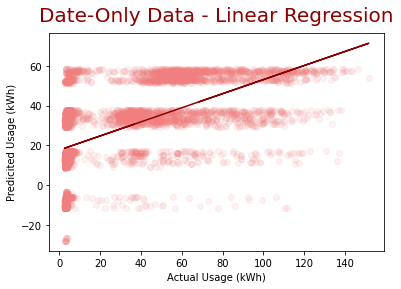

In [132]:
# date_only Visualization

x3 = y3_test
y3 = y3_pred

plt.title('Date-Only Data - Linear Regression', color = 'darkred', fontsize = 20, pad = 12, loc = 'center')
plt.plot(x3, y3, 'o', color = 'lightcoral', alpha = 0.1)

m3, b3 = np.polyfit(x3, y3, 1)
plt.plot(x3, m3 * x3 + b3, color = 'darkred')
plt.xlabel('Actual Usage (kWh)')
plt.ylabel('Predicited Usage (kWh)')
plt.show()